***MODEL***

# Importowanie bibliotek:
- pandas i numpy: do manipulacji danymi.

- sklearn: do modelowania, imputacji brakujących wartości i oceny wyników.

- LogisticRegression: wybrany model do klasyfikacji binarnej.

- accuracy_score: do oceny dokładności predykcji modelu.

- matplotlib.pyplot: do tworzenia wizualizacji danych, takich jak histogramy i wykresy rozkładu.

- missingno: do wizualizacji brakujących wartości w danych, w tym ich rozmieszczenia i korelacji.

- seaborn: do zaawansowanych wizualizacji danych, takich jak heatmapy i wykresy słupkowe.


In [23]:
#import bibliotek 
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Wczytywanie danych i eksploracja
W tej sekcji wczytuję dane treningowe i testowe oraz przeprowadzam wstępną analizę danych.

Wyświetlam podstawowe informację o DF oraz statystyki opisowe 

Analizuję też brakujące wartości wyświetlając kolumny zawierające nan oraz wizualizując. 

Sortuję dane według kolumny 'Working Professional or Student', 
pozwoliło to łatwiej analizować różne grupy
oraz identyfikować wzorce w danych.

In [31]:
# Load the data
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

In [ ]:
# Podstawowe informacje o danych
print(train_df.info())  # Wyświetla podstawowe informacje o DataFrame
print(train_df.describe())  # Generuje statystyki opisowe dla kolumn numerycznych w DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [36]:
# Sprawdzenie brakujących wartości
missing_values = train_df.isnull().sum()
print("Brakujące wartości w zbiorze treningowym:")
print(missing_values)

Brakujące wartości w zbiorze treningowym:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    

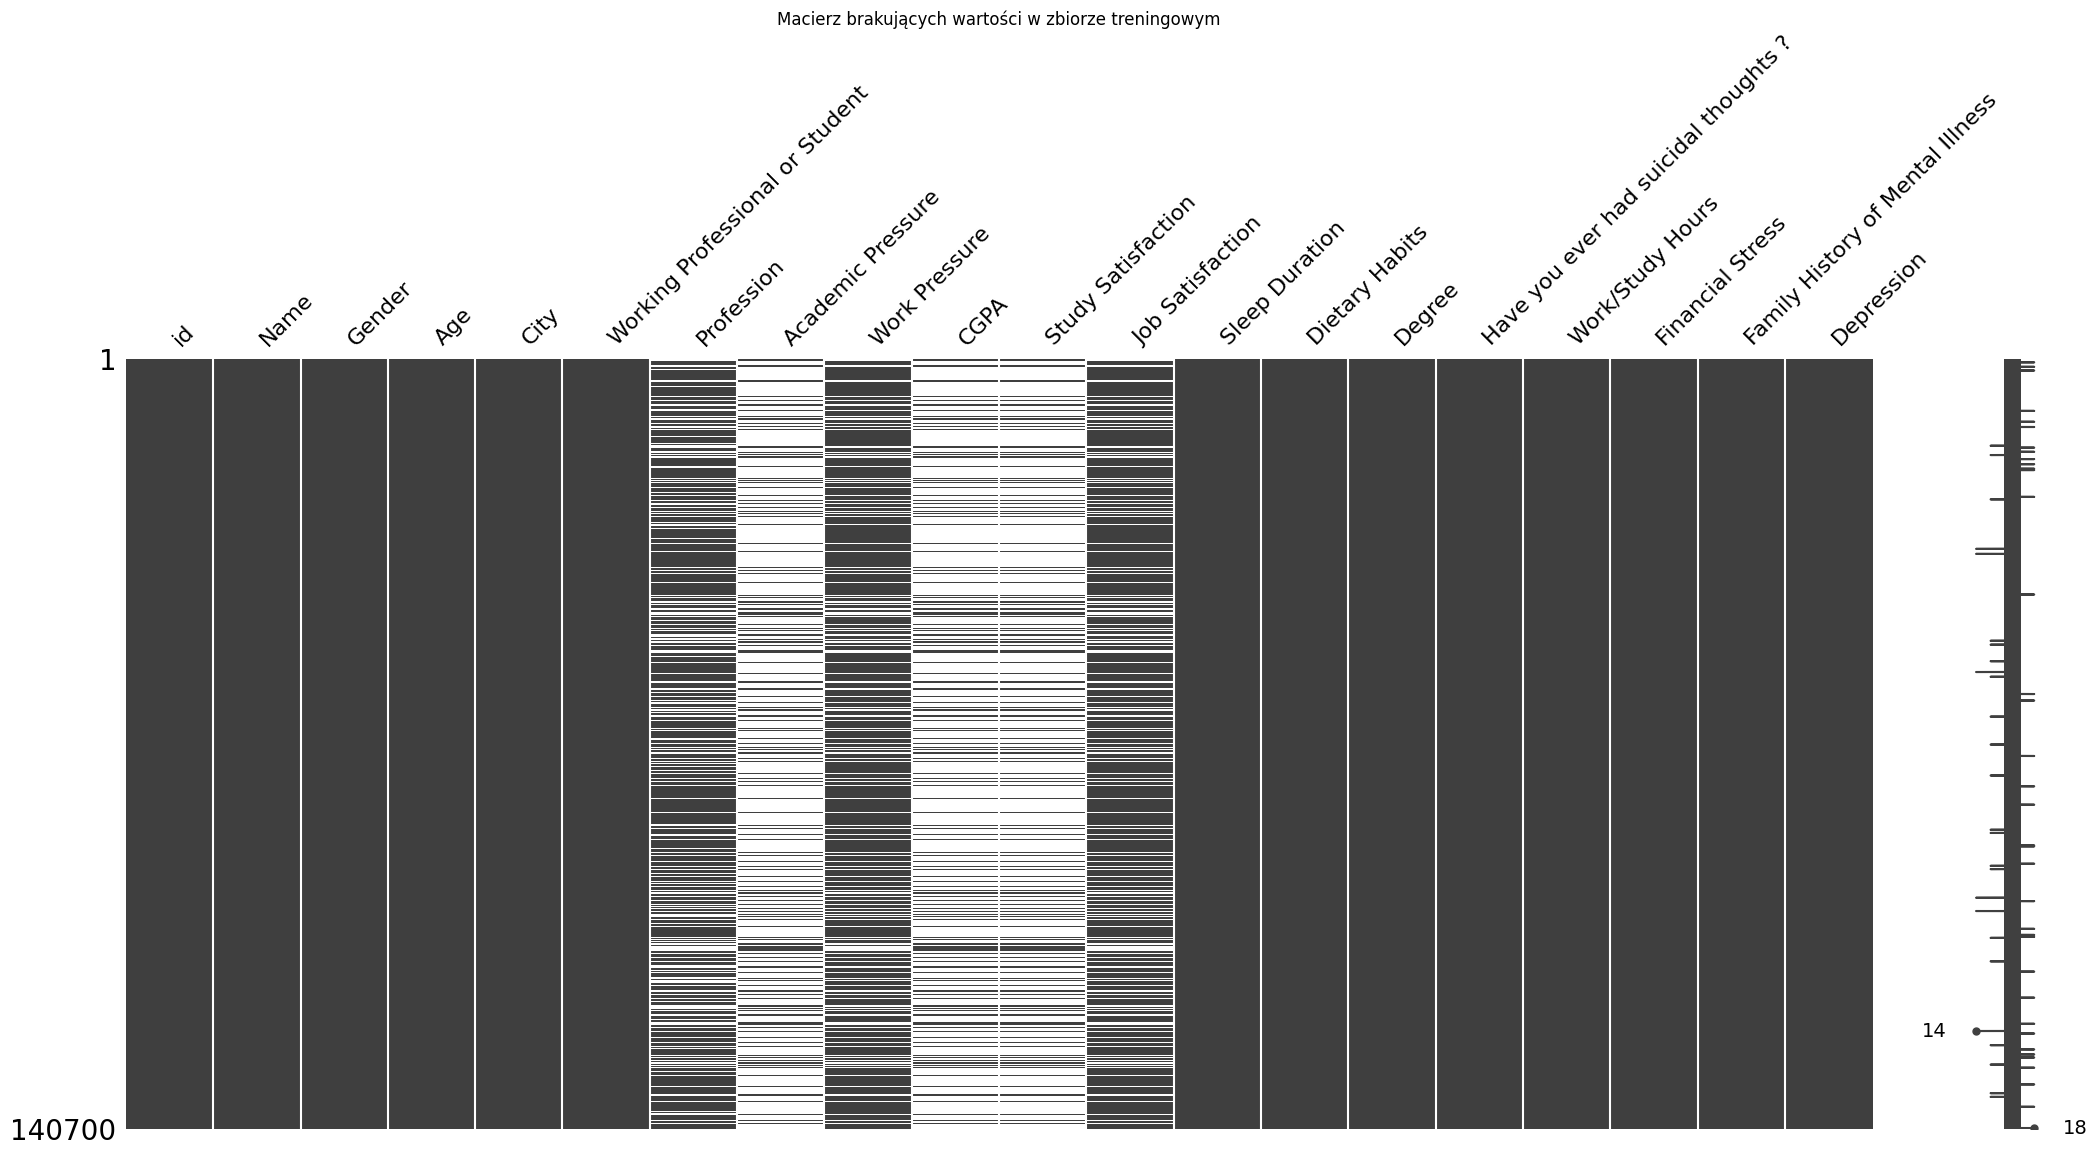

In [ ]:
msno.matrix(train_df)
plt.title("Macierz brakujących wartości w zbiorze treningowym")
plt.show()


In [45]:
#sortowanie
train_df.sort_values('Working Professional or Student')
test_df.sort_values('Working Professional or Student')

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
26084,166784,Nikhil,Male,32.0,Mumbai,Student,NaN,3.0,NaN,5.51,4.0,NaN,5-6 hours,Moderate,MCA,Yes,9.0,1.0,Yes
82355,223055,Aarav,Male,30.0,Visakhapatnam,Student,NaN,4.0,NaN,7.25,3.0,NaN,7-8 hours,Unhealthy,MHM,Yes,8.0,3.0,No
14325,155025,Aarush,Male,31.0,Meerut,Student,NaN,5.0,NaN,9.21,3.0,NaN,7-8 hours,Unhealthy,B.Tech,Yes,12.0,3.0,Yes
59478,200178,Aahana,Female,29.0,Faridabad,Student,NaN,5.0,NaN,5.16,5.0,NaN,Less than 5 hours,Healthy,B.Ed,Yes,4.0,4.0,No
82357,223057,Ishaani,Female,34.0,Hyderabad,Student,NaN,2.0,NaN,5.72,4.0,NaN,Less than 5 hours,Moderate,B.Tech,No,10.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34691,175391,Chirag,Male,20.0,Srinagar,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,7-8 hours,Healthy,Class 12,Yes,2.0,5.0,Yes
34690,175390,Rishi,Male,57.0,Varanasi,Working Professional,Pilot,NaN,3.0,NaN,NaN,1.0,7-8 hours,Moderate,MCA,Yes,11.0,4.0,No
34688,175388,Aditya,Male,29.0,Visakhapatnam,Working Professional,Architect,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,B.Arch,Yes,2.0,2.0,No
34712,175412,Lavanya,Female,43.0,Agra,Working Professional,Content Writer,NaN,3.0,NaN,NaN,2.0,More than 8 hours,Healthy,M.Ed,Yes,5.0,4.0,Yes


# Uzupełnianie brakujących wartości
W tej sekcji zajmuję się brakującymi wartościami w danych:
- Używam `np.where`, aby wypełnić brakujące wartości w kolumnie 'Profession' na podstawie 
  kolumny 'Working Professional or Student'.
- Wypełniam brakujące wartości w kolumnach numerycznych średnimi wartościami tych kolumn.


In [44]:
#profession
train_df['Profession'] = np.where(train_df['Profession'].isna() & train_df['Working Professional or Student'] == 'Working Professional', 1, train_df['Profession'])
test_df['Profession'] = np.where(test_df['Profession'].isna() & test_df['Working Professional or Student'] == 'Working Professional', 1, test_df['Profession'])


In [27]:
numeric_cols = train_df.select_dtypes(include=['number']).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].mean())

#train_df[numeric_cols] = train_df[numeric_cols].fillna(0)

numeric_cols_test = test_df.select_dtypes(include=['number']).columns
test_df[numeric_cols_test] = test_df[numeric_cols_test].fillna(test_df[numeric_cols_test].mean())

#test_df[numeric_cols_test] = test_df[numeric_cols_test].fillna(0)


# Dane Kategoryczne
Używam metody `pd.get_dummies` aby wykonać one-hot encoding dla wszystkich zmiennych kategorycznych w datasecie. 

In [28]:
train_df = pd.get_dummies(train_df, columns=train_df.select_dtypes(include=['object']).columns)
test_df = pd.get_dummies(test_df, columns=test_df.select_dtypes(include=['object']).columns)


# Dopasowanie kolumn między test a train
Upewniam się tutaj, że obydwa zbiory posiadają takie same kolumny, wszelkie brakujące są dodawane i wypełniane 0 

In [29]:
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

if 'Depression' in test_df.columns:
    test_df = test_df.drop(columns=['Depression'])


# Przygotowanie cech i zmiennej docelowej
- Tworzę zmienne zawierające cechy (X_train oraz X_test) i zmienną docelową (y_train)
- Kolumna `Id` jest usuwana ponieważ jej pozostawienie może negatywnie wpłynąć na model

In [30]:
X_train = train_df.drop(columns=['id', 'Depression'])
y_train = train_df['Depression']
X_test = test_df.drop(columns=['id'])


# Trenowanie modelu
- Trenuję model regresji logistycznej
- Prarametr `max_iter` ustawiam na 2000

In [20]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

# Ocena modelu
Sprawdzam, jak dobrze model działa na danych treningowych, 
obliczając dokładność predykcji (accuracy_score).

In [21]:
# Print the accuracy score on the training data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 0.9402


In [22]:
# Make predictions
predictions = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'Depression': predictions
})
submission.to_csv('submission.csv', index=False)